# Hass Consulting Company real estate Analysis: 
## factors that affect housing prices and a model that allows the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 1. Defining the Question

### a) Specifying the Question


> You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.




### b) Defining the Metric for Success
<p> House prices
<p> Years the house was built and renovated
<p> Where the house is located

### c) Understanding the context 
<p> Real esteta pricing depends on many facteros... Same houses build with same number of bedrooms and area can fetch different prices in fdifferent locations. 
<p> Pricing is also affected by the interest rates in that area. 

### d) Data Relevance
<p> We have been given housing dataset that has all the details to use to do the regression. 


## 2. Reading the Data

In [73]:
# Loading the Dataset
# Dataset url =http://bit.ly/IndependentProjectWeek7Dataset 
#

## 3. Checking the Data

### Importing required libraries 

In [74]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt


### Load data

In [75]:
houses = pd.read_csv('data/house_data.csv')



In [76]:
# Determining the no. of records in our dataset
houses.shape

(21613, 20)

In [77]:
# Previewing the top of our dataset
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [78]:
houses['cord'] = list(zip(houses.lat, houses.lon))
houses

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,cord
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)"
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(47.721, -122.319)"
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.233)"
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.393)"
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,"(47.6993, -122.346)"
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,"(47.5107, -122.362)"
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,"(47.5944, -122.299)"
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,"(47.5345, -122.069)"


<AxesSubplot:>

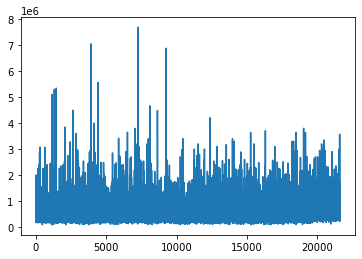

In [79]:
houses['price'].plot()

In [80]:
houses['geocode_data'] = ''
houses['city'] = ''
houses['country'] = ''

In [81]:
import requests
def reverse_geocode(latlng):
    result = {}
    url = 'https://maps.googleapis.com/maps/api/geocode/json?latlng={}'
    request = url.format(latlng)
    data = requests.get(request).json()
    if len(data['results']) > 0:
        result = data['results'][0]
    return result

In [82]:
#longlat = houses[['lat','long']].values
#houses['geocode_data'] = houses['cord'].map(reverse_geocode)

### checking and making sure each colum has appropriate data types 

In [83]:
# Checking whether Fifa ranking has an appropriate datatype
#
houses.info()
#Date  need to be converted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  lon            21613 non-null  float64
 18  sqft_l

In [84]:
# convert date columns  to date type
houses['yr_built']=pd.to_datetime(houses['yr_built'])
houses['yr_renovated']=pd.to_datetime(houses['yr_renovated'])


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

<p> Checked though Kaggle and other housing datasets. realized that the same data exists in otehr popular data banks and similar ones with same features. Can be used to create models

## 5. Tidying the Dataset

In [85]:
# Checking for Outliers
#

In [86]:
# Checking for Anomalies
#

<AxesSubplot:>

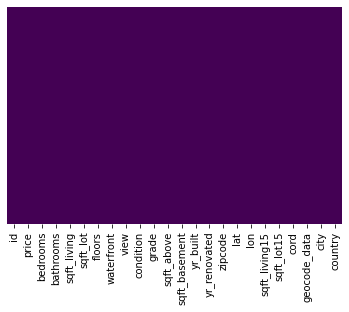

In [87]:
# Identifying the Missing Data
sns.heatmap(houses.isnull(), yticklabels=False,cbar=False, cmap='viridis')


In [88]:
# missing data in the fifa ranking 

#sns.heatmap(fifa_ranking.isnull(), yticklabels=False,cbar=False, cmap='viridis')
houses.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
lon              0
sqft_living15    0
sqft_lot15       0
cord             0
geocode_data     0
city             0
country          0
dtype: int64

### Seems there are no missing values. 

###  More data cleaning procedures

In [89]:
# We will try to assign new column called cities and countres to do reverse geo to get those details from
# lon and lat given 


## 6. Exploratory Analysis

In [90]:
# Chcck the correlations between numeric variables 
houses.corr()

#It shows that home score is negatively correlated to home rank. 
# This is because when a rank is high, the team perfemace is not good
#same case for away rank and score. 


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,lon,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Text(0, 0.5, 'Number of houses')

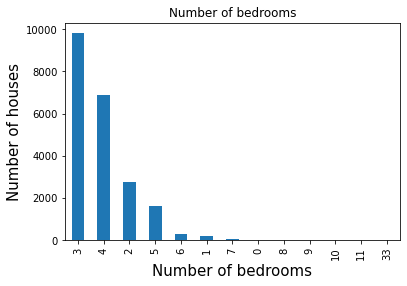

In [91]:
#Plot a graph on the for wins losses and draws for home team
#This shows that home teams win more than away team. Draws and losses seems to be balanced. 
houses['bedrooms'].value_counts().plot(kind='bar')
plt.title("Number of bedrooms")
plt.xlabel("Number of bedrooms",fontsize=15)
plt.ylabel("Number of houses",fontsize=15)



## 7. Implementing the Solution

### Using Multiple Linear Regression

In [92]:
# define X and Y
houses.head()
X = houses.drop(['id','price','lat','lon','yr_built','yr_renovated','zipcode','floors','bathrooms','geocode_data','city','country','cord'], axis=1)
y = houses['price']
X

,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1180,5650,0,0,3,7,1180,0,1340,5650
1,3,2570,7242,0,0,3,7,2170,400,1690,7639
2,2,770,10000,0,0,3,6,770,0,2720,8062
3,4,1960,5000,0,0,5,7,1050,910,1360,5000
4,3,1680,8080,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,1530,1131,0,0,3,8,1530,0,1530,1509
21609,4,2310,5813,0,0,3,8,2310,0,1830,7200
21610,2,1020,1350,0,0,3,7,1020,0,1020,2007
21611,3,1600,2388,0,0,3,8,1600,0,1410,1287


In [93]:
#train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [94]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [95]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 356044.17157214, 1409851.52554256,  364440.74151714, ...,
        344410.53591321,  352425.59221456,  354903.04983305])

In [96]:
# Check the score of the reression 

### Using Quantile Regression

In [97]:
# We will use the python package statsmodels for Quantile Regression
# #
# import statsmodels.formula.api as smf

# # Finding the regression coefficients for the conditioned median, 0.5 quantile
# #
# mod = smf.quantreg('y ~ X', houses)
# res = mod.fit(q=.5)

# # Then print out the summary of our model
# print(res)
# #
# print(res.summary())

#The data provided cannot work on quatile regression


### Using Ridge Regression

In [98]:
#We will use X and y defined from the previous regression
from sklearn.metrics import mean_squared_error
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

53081260158.11017


In [99]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [100]:
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 
# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 53458614653.01307 is better than what the baseline model was (53081260158.11017). 

53458614653.01307

### Using Lasso Regression

In [101]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = houses[['bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_living15']]
y = houses[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-0.39873715, -0.97983502, -0.22832133, ..., -0.30575946,
        -0.62918687, -0.9433552 ],
       [-0.39873715,  0.53363434, -0.18988538, ..., -0.30575946,
        -0.62918687, -0.43268619],
       [-1.47395936, -1.42625404, -0.12329847, ..., -0.30575946,
        -0.62918687,  1.07013975],
       ...,
       [-1.47395936, -1.15404732, -0.33213703, ..., -0.30575946,
        -0.62918687, -1.41025258],
       [-0.39873715, -0.52252773, -0.30707641, ..., -0.30575946,
        -0.62918687, -0.8412214 ],
       [-1.47395936, -1.15404732, -0.33875227, ..., -0.30575946,
        -0.62918687, -1.41025258]])

In [102]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5705816316409281
lasso MSE: 57949478535.82692
lasso coef: [-43745.11243987 240025.02633694 -17152.88714058  48791.06455739
  51034.99601016  28858.72880127  37239.16351329]


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 23.0}
lasso score: 0.5884046970035701
linear score: 0.5884032395801593
lasso MSE: 58432897976.168396
linear MSE: 58433104882.01219
lasso best estimator coef: [-46085.3275691  238373.63977112 -15940.5824976   47513.40114437
  49613.43002409  30736.2412603   39266.15148364]
linear coef: [[-46142.41656991 238422.94252265 -15971.53381133  47527.02619835
   49618.355463    30764.00431874  39278.84634083]]


### Elastic Net Regression

In [104]:

regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

57949478528.00434


## 8. Challenging the solution

> Our model might not be able to give correct predition of the house prices given that prices sometimes depend on demand and supply 







### a). Did we have the right data?
Yes. Data given was well and enough to create  a model.

### b). Do we need other data to answer our question?

Yes. For demand and supply for specific regions. Maybe to show number of houses sold per  year

### c). Did we have the right question?

Yes since we have people who want to invest in the housing business